# Algorithmic Data Science: Week 4 lab - Unit 3 Matrices

## Introduction

One usually uses the numpy library to do matrix manipulations in Python. Let's import that, and create a couple of matrices, as numpy arrays. Here [1,3,4] is the first row of A, [2,-1,0] is the second row, and so on.

In [1]:
import numpy as np

A=np.array([[1,3,4],[2,-1,0],[3,7,9]])
B=np.array([[0,6,1],[-1,-1,5],[3,0,-1]])

print(A)

[[ 1  3  4]
 [ 2 -1  0]
 [ 3  7  9]]


To access an individual component, use indices, starting from 0 (this is different from standard hand-written mathematics, for which indices start from 1).

In [2]:
print(A[0,1])

3


You add matrices just using + (and subtract just using -).

In [3]:
C=A+B
print(C)

[[ 1  9  5]
 [ 1 -2  5]
 [ 6  7  8]]


You can multiply by a scalar like so:

In [4]:
C=5*A
print(C)

[[ 5 15 20]
 [10 -5  0]
 [15 35 45]]


For multiplication you normally use:

In [5]:
C=np.matmul(A,B)
print(C)

[[ 9  3 12]
 [ 1 13 -3]
 [20 11 29]]


However in this lab we're going to use our own functions for implementing the naive method of matrix multiplication and Strassen's method. 

## Exercise 1

Here is a basic function for implementing the naive method, assuming square matrices are input:

In [7]:
def naivemult(A,B):

    (m,n) = np.shape(A)
        
    C = np.zeros([m,m])
    
    for i in range(m): # for the rows
        for j in range(m): # for the columns 
            for k in range(m): # to coordinate the cols and rows
                C[i,j] += A[i,k] * B[k,j]
        
    return C

# first i will grab the 0 row for matrix A
# first j will grab the 0 column for matrix B
# the k will run through a full interaction, running down the dimension of each vector
# each interation will be added to the first empty value in C
# next the j interaction will cycle over 1
# this will grab the 1 column for matrix B and the next empty value to fill

In [8]:
C=naivemult(A,B)

Repeat the exercise you did last week for the insertion-sort algorithm on the naive matrix multiplication algorithm. I.e., obtain a graph of run time against *n*, for multiplying *n*x*n* matrices, and then do some analyses with your data to demonstrate that the time complexity is $O(n^3)$.

In [9]:
import numpy as np
import time

def timeit(somefunc,*args,repeats=10,**kwargs):
    times=[]
  
    while repeats>0:
        starttime=time.time()
        ans=somefunc(*args,**kwargs)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
        repeats-=1
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

In [10]:
import random

def n_vector(n):
    return [random.randint(0,10) for n in range(n)]

def n_matrix(n):
    return np.array([n_vector(n) for z in range(n)])

a = n_matrix(3)
print(a)
b = n_matrix(3)
print(b)

[[2 1 0]
 [0 8 6]
 [6 1 2]]
[[4 0 6]
 [8 6 6]
 [4 5 2]]


In [11]:
xs=[]
ys=[]

for n in range(1,150,10):
    xs.append(n)
    A=n_matrix(n)
    B=n_matrix(n)
    (mean,stdev)=timeit(naivemult, A, B,repeats=10)
    ys.append(mean)

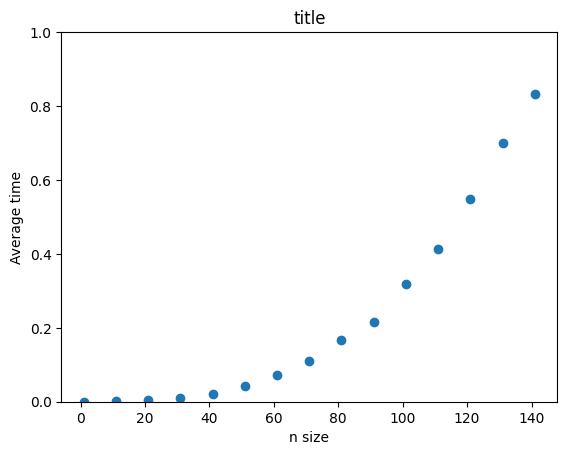

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(xs,ys)
plt.ylim(0,1)
plt.xlabel("n size")
plt.ylabel("Average time")
plt.title("title")
plt.show()

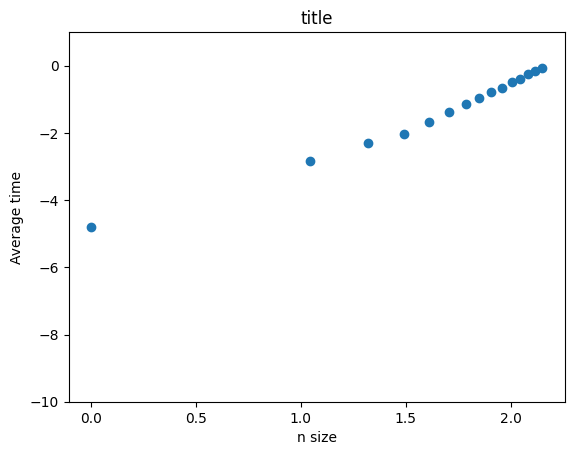

In [13]:
logxs=[np.log10(x) for x in xs]
logys=[np.log10(y) for y in ys]

plt.scatter(logxs,logys)
plt.ylim(-10,1)
plt.xlabel("n size")
plt.ylabel("log time")
plt.title("log dims")
plt.show()

In [14]:
import scipy.stats as stats

res = stats.linregress(logxs, logys)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 2.246421245161495 and intercept is -5.085904809292585


Using *np.matmul* is more efficient because it makes use of parallelisation, which we'll discuss in lecture 4, and also runs the for loops in C, so there is less overhead with Python having to repeatedly execute commands in C.

Repeat the exercise using this function to see how much more efficient it is.

In [15]:
xs2=[]
ys2=[]

for n in range(1,150,10):
    xs2.append(n)
    A=n_matrix(n)
    B=n_matrix(n)
    (mean,stdev)=timeit(np.matmul, A, B,repeats=10)
    ys2.append(mean)

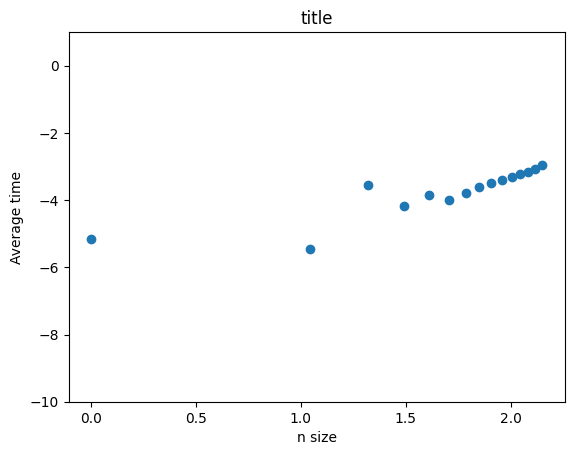

In [16]:
logxs2=[np.log10(x) for x in xs2]
logys2=[np.log10(y) for y in ys2]

plt.scatter(logxs2,logys2)
plt.ylim(-10,1)
plt.xlabel("n size")
plt.ylabel("Average time")
plt.title("title")
plt.show()

In [17]:
import scipy.stats as stats

res = stats.linregress(logxs2, logys2)
print("Slope is {} and intercept is {}".format(res.slope,res.intercept))

Slope is 1.1085786159595943 and intercept is -5.600195547495707


## Exercise 2

Write a function to implement Strassen's method. (If you are relatively new to Python, just copy and paste this from the solutions, or search for the code on the internet, or use AI to assist you.) You may assume the inputs are square matrices with $n = 2^p$,  where $p$ is a positive integer.

- https://www.youtube.com/watch?v=2IgZuVGwEb0
- https://www.youtube.com/watch?v=OSelhO6Qnlc


- Compare run-times of the naive method and Strassen's method for matrix multiplication.  Consider square matrices where $n = 2^p,  p \in \{1,2,3,\ldots\}$.  To make really big matrices, you could generate random numbers to populate the elements.

- What's the biggest value of $p$ you can use and obtain an output within a couple of minutes? Which method is faster for the largest value of $p$? 

- Because Strassen's method involves so many additions and subtractions, it is inefficient to use Strassen's method all the way down the recursion. If this is what you've done, then try making a small modification to not do recursion all the way down- instead switch to the naive method once the recursion has broken your large matrix down into matrices of a certain size. Can you then get Strassen's method to beat the naive method?



- (Optional) Can you work out how much memory you are using for each method? Is there a way to use less memory?

## Optional extension exercises

- Implement the naive methods of finding determinants and inverses of square matrices.  Can you handle 4x4 or even 5x5 matrices?  What happens to the running time as n gets larger?

- Read up on LUP decomposition, and explore the run-time for finding the inverse of a matrix via LUP decomposition
